# Time Series Analysis using LSTM :

- 𝐋𝐒𝐓𝐌 - 𝐋𝐨𝐧𝐠 𝐒𝐡𝐨𝐫𝐭-𝐓𝐞𝐫𝐦 𝐌𝐞𝐦𝐨𝐫𝐲 :

In [1]:
# Import Necessary Libary :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import warnings :
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the data :
df = pd.read_csv("D:\Dataset files_ML\monthly_milk_production.csv", index_col="Date", parse_dates=True)   #Date function ko index kiye

In [4]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [5]:
df.loc["1962-01":"1962-04"]

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656


In [6]:
df.loc["1962"].mean()

Production    615.75
dtype: float64

<Axes: xlabel='Date'>

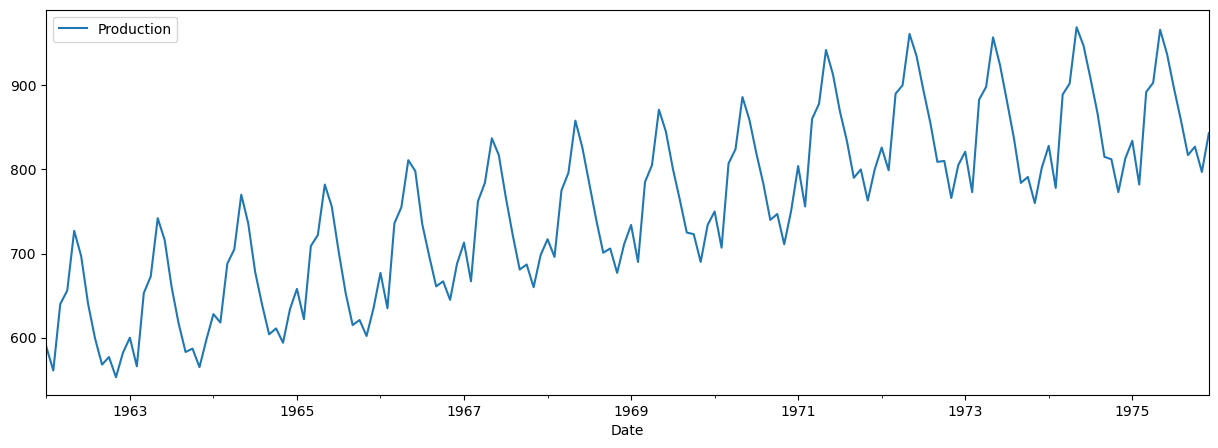

In [7]:
# Plot the data :
df.plot(figsize=(15,5))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Setting frequency to start of the month :
df.index.freq = "MS"

In [10]:
# decompose of time series :
result = seasonal_decompose(df["Production"])

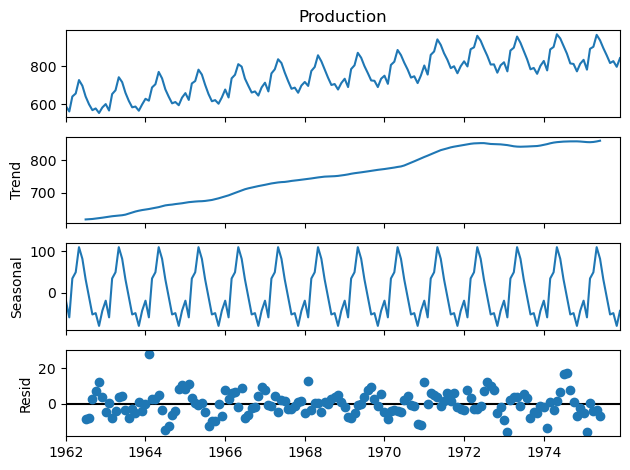

In [11]:
# plot the decomposition :
result.plot();

In [12]:
len(df)

168

In [13]:
train = df.iloc[:156]   # Firts 156 rows
test = df.iloc[156:]    # starting from 156 rows to end of the dataframe

In [14]:
len(train)

156

In [15]:
len(test)

12

In [16]:
train.iloc[0], train.iloc[-1]

(Production    589
 Name: 1962-01-01 00:00:00, dtype: int64,
 Production    813
 Name: 1974-12-01 00:00:00, dtype: int64)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
# Fit the training data :
scaler.fit(train)

MinMaxScaler()

In [20]:
# Transform the training data :
scaled_train = scaler.transform(train)

# Transform the test data using same scaler :
scaled_test = scaler.transform(test)

In [21]:
scaled_train[:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
n_input = 3

In [24]:
# creating time series generator :
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input,  batch_size=1)

In [25]:
len(generator)

153

In [26]:
# Retrive the 1st batch of data :
x, y = generator[0]
x.ravel(), y          # 1D Array 

(array([0.08653846, 0.01923077, 0.20913462]), array([[0.24759615]]))

In [27]:
# Retrive the 2nd batch of the data :
x, y = generator[1]
x.ravel(), y

(array([0.01923077, 0.20913462, 0.24759615]), array([[0.41826923]]))

In [28]:
x.shape

(1, 3, 1)

In [29]:
df.head(3), df.tail(3)

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640,
             Production
 Date                  
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [30]:
n_input = 12

In [31]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input,  batch_size=1)

In [32]:
x, y = generator[0]
x.ravel(), y

(array([0.08653846, 0.01923077, 0.20913462, 0.24759615, 0.41826923,
        0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
        0.        , 0.06971154]),
 array([[0.11298077]]))

In [33]:
x.shape

(1, 12, 1)

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
# import layers :
from tensorflow.keras.layers import Dense, LSTM

In [36]:
# Create a model :
model = Sequential()

In [37]:
# Add layer :
model.add(LSTM(1000, activation="relu", input_shape=(12, 1)))
model.add(Dense(1))

In [38]:
# Compile the model :
model.compile(optimizer="adam", loss="mse")

In [39]:
# Fit the model :
model.fit(generator, epochs=40)

Epoch 1/40

144/144 [==============================] - 30s 180ms/step - loss: 0.0322
Epoch 2/40
144/144 [==============================] - 24s 163ms/step - loss: 0.0177
Epoch 3/40
144/144 [==============================] - 25s 175ms/step - loss: 0.0068
Epoch 4/40
144/144 [==============================] - 24s 168ms/step - loss: 0.0038
Epoch 5/40
144/144 [==============================] - 24s 164ms/step - loss: 0.0042
Epoch 6/40
144/144 [==============================] - 24s 163ms/step - loss: 0.0039
Epoch 7/40
144/144 [==============================] - 25s 171ms/step - loss: 0.0036
Epoch 8/40
144/144 [==============================] - 26s 182ms/step - loss: 0.0022
Epoch 9/40
144/144 [==============================] - 26s 179ms/step - loss: 0.0024
Epoch 10/40
144/144 [==============================] - 25s 177ms/step - loss: 0.0027
Epoch 11/40
144/144 [==============================] - 25s 176ms/step - loss: 0.0033
Epoch 12/40
144/144 [==============================] - 26s 183ms/step - l

In [40]:
# Find loss history :
loss = model.history.history["loss"]

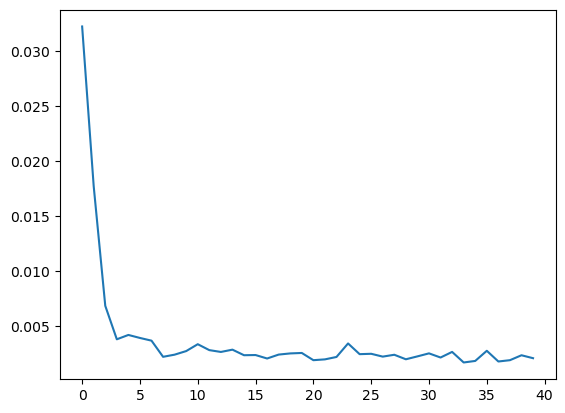

In [41]:
# plot the loss :
plt.plot(loss)

In [42]:
last_train_batch = scaled_train[-12:]

In [43]:
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [44]:
#Convert into 3D:
last_train_batch = last_train_batch.reshape((1, 12 ,1))

In [45]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [46]:
# Predict the model 
model.predict(last_train_batch)

1/1 [==============================] - 2s 2s/step


array([[0.6921618]], dtype=float32)

In [47]:
scaled_test[0]

array([0.67548077])

In [48]:
test_pred = []

# Create the 1st batch for evaluction from last 12 time steps for the training data :
first_eval_batch = scaled_train[-12:]

# Reshape the 1st evaluction batch to the current input shape for thr model :
current_batch = first_eval_batch.reshape((1, 12, 1))

for i in range(len(test)):
    # Make a prediction for current batch using trained model :
    current_pred = model.predict(current_batch)[0]
    
    # Append the predicted value :
    test_pred.append(current_pred)
    
    # Update the current batch :
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 60ms/step


In [49]:
test_pred

[array([0.6921618], dtype=float32),
 array([0.60960037], dtype=float32),
 array([0.84050703], dtype=float32),
 array([0.8935115], dtype=float32),
 array([1.0385005], dtype=float32),
 array([1.0044336], dtype=float32),
 array([0.9126005], dtype=float32),
 array([0.80232525], dtype=float32),
 array([0.6730169], dtype=float32),
 array([0.64083725], dtype=float32),
 array([0.56225413], dtype=float32),
 array([0.6422825], dtype=float32)]

In [50]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [51]:
# Convert the prediction back to their original scale :
Actual_pred = scaler.inverse_transform(test_pred)

In [52]:
# Add the new column :
test['predicted_production'] = Actual_pred

In [53]:
test.head()

,Production,predicted_production
Date,,
1975-01-01,834,840.939308
1975-02-01,782,806.593752
1975-03-01,892,902.650925
1975-04-01,903,924.700773
1975-05-01,966,985.016228


<Axes: xlabel='Date'>

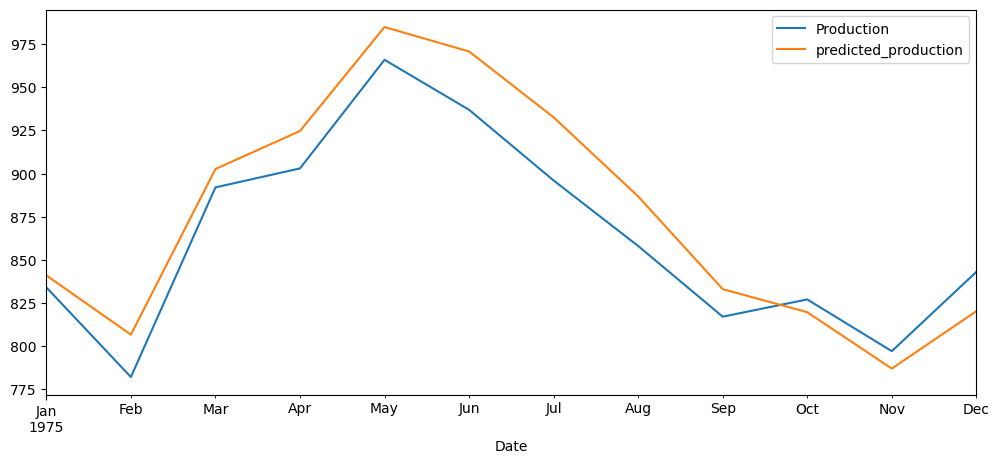

In [54]:
# Plot the test data :
test.plot(figsize=(12, 5))

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
rsme = np.sqrt(mean_squared_error(test["Production"], test["predicted_production"]))

In [57]:
#Average mean squared error:
print("𝐑𝐒𝐌𝐄: ", rsme)

𝐑𝐒𝐌𝐄:  22.07397003776669
